# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import ndimage #era la mas usada antes de sklean, vamos a compararlos
# esta es la matriz de distancia, similar a la de textura
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


# Generación de la data

* Crear data

In [ ]:
#Genero 2 features, y centroides
X1, y1 = make_blobs(n_samples=50, centers = [[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

* Grafico

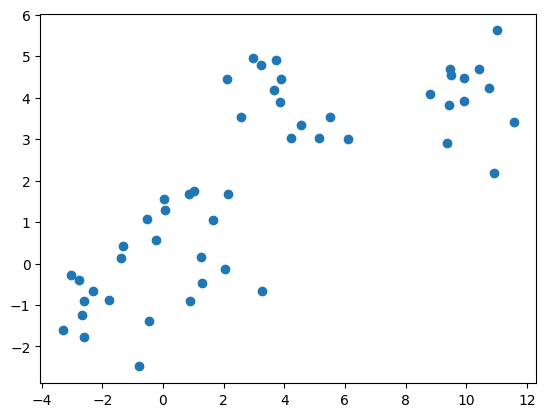

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

# Entrenamiento

## Primero con el scipy antiguo

* Creo modelo/lo instancio

In [ ]:
#n_init es la seminlla
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

*  Entreno

In [ ]:
agglom.fit(X1) ## no le paso y1

AgglomerativeClustering(linkage='average', n_clusters=4)

## Verifiquemos el resultado del clustering

* Grafiquemos los centroides y sus labels



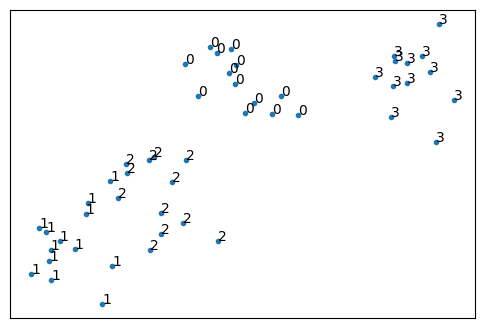

In [ ]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis =0), np.max(X1, axis=0) #Escalamos los datos, ya que algunos son dispersos
x1 = (X1 - x_min) / (x_max - x_min)#quitamos valor minimo y dividimnos entre el range, esto solo para mostarlos


for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i])),
  color = plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
  fontdict = {'weight' : ' bold', 'size':9}
  

#meove axis ticks
plt.xticks([])
plt.yticks([])
plt.scatter(X1[:,0], X1[:,1],marker= '.')
plt.show()

* Calculemos la materiz de distancais (distancia de cad punto con el resto

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[ 0.          4.11046389  9.91027639 ...  3.74656776  9.84773165
   2.67640025]
 [ 4.11046389  0.         13.52490221 ...  7.707544   13.80179554
   3.1848244 ]
 [ 9.91027639 13.52490221  0.         ...  8.41440513  2.54704023
  10.51330052]
 ...
 [ 3.74656776  7.707544    8.41440513 ...  0.          7.45296948
   6.23285977]
 [ 9.84773165 13.80179554  2.54704023 ...  7.45296948  0.
  11.06800473]
 [ 2.67640025  3.1848244  10.51330052 ...  6.23285977 11.06800473
   0.        ]]


* En variable Z, veo si puego hacer alguna otra agruapcion usando esta dis_matrix como linakge

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-97-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


* Dendograma

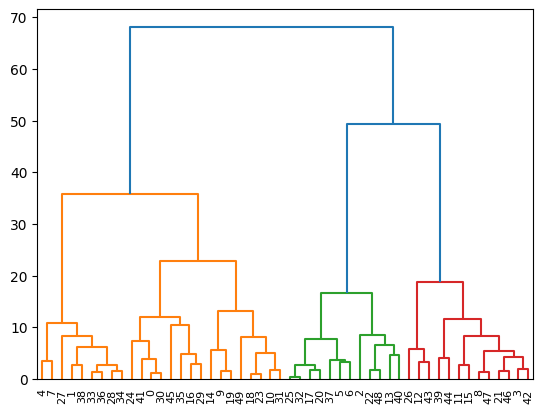

In [ ]:
dendro = hierarchy.dendrogram(Z)

# veo que 4, 3 o 2 clsuters es lo que mas se ajusta

* Otro dendograma pero ahora con la media

<ipython-input-99-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


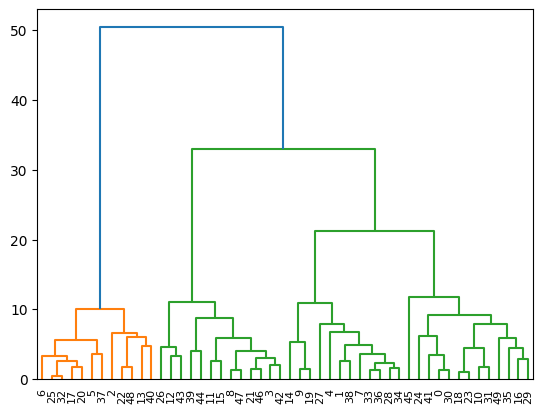

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

# Evaluación

* Revisemos las etiquetas encontradas por el modelo vs las etiquetas reales

In [ ]:
agglom.labels_

array([0, 1, 3, 2, 1, 3, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2, 0, 3, 0, 0, 3, 2,
       3, 0, 0, 3, 2, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 0, 2, 2,
       2, 0, 2, 2, 3, 0])

In [ ]:
y1

array([2, 1, 3, 0, 1, 3, 3, 1, 0, 1, 2, 0, 0, 3, 1, 0, 2, 3, 2, 1, 3, 0,
       3, 2, 2, 3, 0, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 3, 1, 0, 3, 2, 0, 0,
       0, 2, 0, 0, 3, 2])

* Calculo coeficiente de silueta

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

#reshape porque espera matriz
ss= silhouette_score(y1.reshape(-1,1), agglom.labels_)

print(ss)

0.8285714285714285


* Otras métricas, cuando conozco un poco el DS

In [ ]:
from sklearn import metrics

In [ ]:
metrics.homogeneity_score(y1, agglom.labels_)

0.8916482416644681

In [ ]:
metrics.completeness_score(y1, agglom.labels_)

0.8979136706080778

In [ ]:
metrics.v_measure_score(y1, agglom.labels_)

0.8947699882006073

In [ ]:
#puedo sacar las 3 a la vez
metrics.homogeneity_completeness_v_measure(y1, agglom.labels_)

(0.8916482416644681, 0.8979136706080778, 0.8947699882006073)

* Grafico de

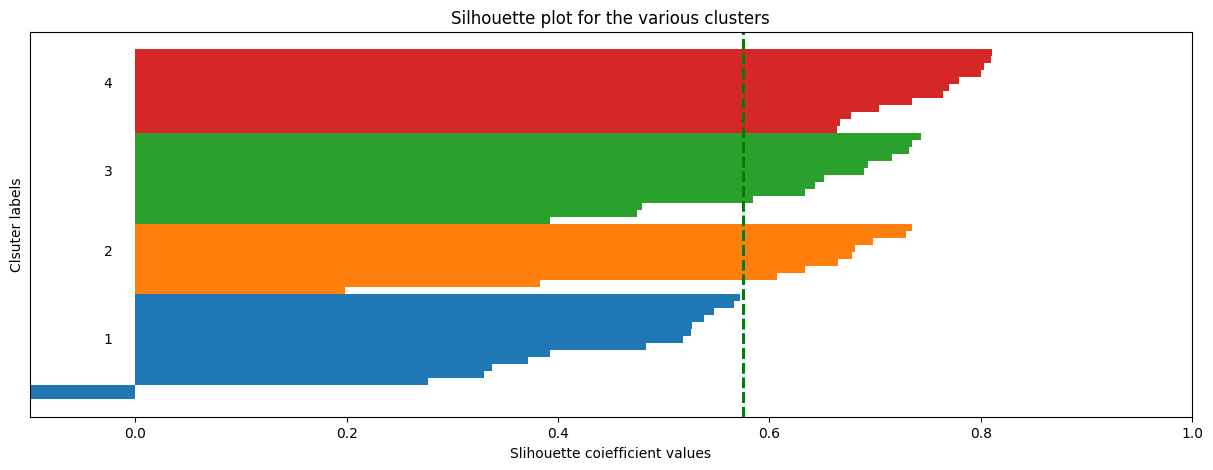

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (15,5))
y_ticks = []
y_lower = y_upper = 0
silhouette_vals = silhouette_samples(X1, agglom.labels_) 

for i,cluster in enumerate(np.unique(agglom.labels_)):
    cluster_silhouette_vals = silhouette_vals[agglom.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    ax.barh(range(y_lower,y_upper),
      cluster_silhouette_vals, height =1
      );
    ax.text(-0.03, (y_lower + y_upper)/2, str(i+1))
    y_lower += len(cluster_silhouette_vals)

    #Get the avergae silhouette score
    avg_score = np.mean(silhouette_vals)
    ax.axvline(avg_score, 
      linestyle = '--',
      linewidth = 2, color = 'green')
    ax.set_yticks([])
    ax.set_xlim([-0.1,1])
    ax.set_xlabel('Slihouette coiefficient values')
    ax.set_ylabel('Clsuter labels')
    ax.set_title('Silhouette plot for the various clusters')


